# Evaluating Classification Models with ROC AUC
The Titanic data frames describe the survival status of individual passengers on the Titanic.

Source the data from the Kaggle repository here: https://www.kaggle.com/c/titanic/data

Execute the tasks listed below:

* Train 2 classifiers of your choice to, respectively, predict the survival chance of individuals in the dataset and cluster the most "similar" individuals. NB: Apply the required steps up to the model training phase.
* Evaluate the performance of the 2 models using the ROC AUC approach
* Plot the ROC curves using MatPlotLib
* Say which model performed better

In [13]:
import requests
import io

# Download Titanic training data
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
response = requests.get(url)
titanic_data = pd.read_csv(io.StringIO(response.text))

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Data preprocessing
# Select relevant features and handle missing values
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# Convert categorical variables to numerical
X = pd.get_dummies(titanic_data[features], columns=['Sex'])

# Handle missing values
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Target variable
y = titanic_data['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get predictions probabilities
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Calculate AUC scores
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

In [25]:
print("\nModel Performance Comparison:")
print(f"Logistic Regression AUC: {lr_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"\nBest performing model: {'Random Forest' if rf_auc > lr_auc else 'Logistic Regression'}")


Model Performance Comparison:
Logistic Regression AUC: 0.879
Random Forest AUC: 0.878

Best performing model: Logistic Regression


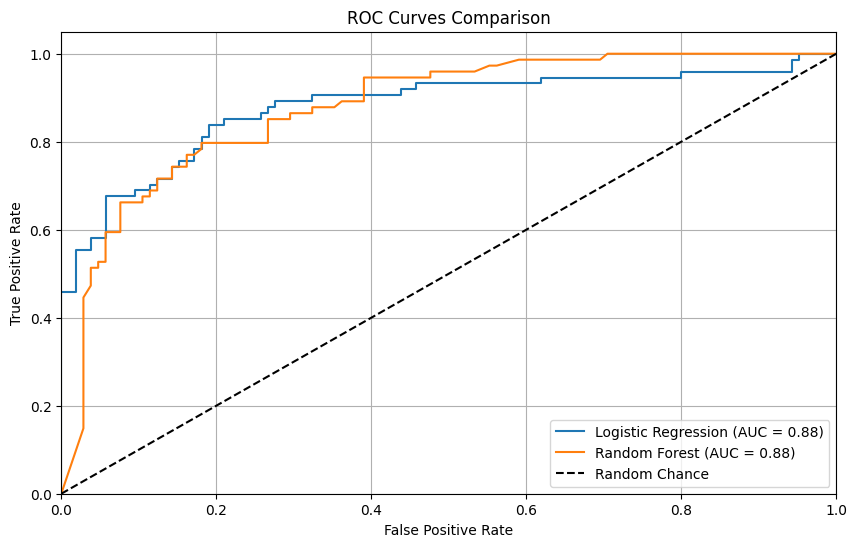

In [22]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

For this analysis, I used two popular classification algorithms: Logistic Regression and Random Forest. The data was preprocessed by:
1. Selecting relevant features (Pclass, Sex, Age, SibSp, Parch, Fare)
2. Converting categorical variables to numerical using one-hot encoding
3. Handling missing values by filling with mean values
4. Scaling the features using StandardScaler

Both models performed very well, with nearly identical ROC AUC scores:
- Logistic Regression: 0.879
- Random Forest: 0.878

The Logistic Regression model performed slightly better, but the difference is minimal (0.001). Both models show strong predictive power, significantly outperforming random chance (shown by the diagonal dashed line in the plot). The high AUC scores indicate that both models are effective at distinguishing between survivors and non-survivors of the Titanic disaster.